In [40]:
import pandas as pd 
df = pd.read_csv('../data/cleaned_insurance_analysis.csv')

C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3387000535.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned_insurance_analysis.csv')


In [41]:
df = df.dropna(subset=['TotalClaims', 'CalculatedPremiumPerTerm'])
import os
import sys
sys.path.append('../scripts')
from modeling import prepare_data
df = prepare_data(df)


In [42]:
print(df.columns.tolist())


['Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'PostalCode', 'SubCrestaZone', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 'CoverCategory', 'CoverType', 'TotalPremium', 'TotalClaims', 'LossRatio', 'HasClaim', 'Citizenship_AF', 'Citizenship_ZA', 'Citizenship_ZW', 'LegalType_Individual', 'LegalType_Partnership', 'LegalType_Private company', 'LegalType_Public company', 'LegalType_Sole proprieter', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_FirstRand Bank', 'Bank_Investec Bank', 'Bank_Ithala Bank', 'Bank_Mercantile Lisbon Bank', 'Bank_Nedbank', 'Bank_Old Mutual', 'Bank_RMB Private Bank', 'Bank_Standard Bank', 'Bank_Unknown', 'AccountType_Savings account', 'AccountType_Transmission account', 'AccountType_Unknown', 'MaritalStatus_Not specified',

In [43]:
from sklearn.model_selection import train_test_split

df = prepare_data(df)

# Filter to only rows with claims > 0
df_sev = df[df['TotalClaims'] > 0]

X_sev = df_sev.drop(columns=['TotalClaims', 'HasClaim'])  # Features
y_sev = df_sev['TotalClaims']  # Target

# Split train-test
X_sev_train, X_sev_test, y_sev_train, y_sev_test = train_test_split(X_sev, y_sev, test_size=0.3, random_state=42)


In [44]:
print(df_sev.columns.tolist())


['Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'PostalCode', 'SubCrestaZone', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 'CoverCategory', 'CoverType', 'TotalPremium', 'TotalClaims', 'LossRatio', 'HasClaim', 'Citizenship_AF', 'Citizenship_ZA', 'Citizenship_ZW', 'LegalType_Individual', 'LegalType_Partnership', 'LegalType_Private company', 'LegalType_Public company', 'LegalType_Sole proprieter', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_FirstRand Bank', 'Bank_Investec Bank', 'Bank_Ithala Bank', 'Bank_Mercantile Lisbon Bank', 'Bank_Nedbank', 'Bank_Old Mutual', 'Bank_RMB Private Bank', 'Bank_Standard Bank', 'Bank_Unknown', 'AccountType_Savings account', 'AccountType_Transmission account', 'AccountType_Unknown', 'MaritalStatus_Not specified',

In [45]:
df_sev['VehicleIntroDate'] = pd.to_datetime(df_sev['VehicleIntroDate'], errors='coerce')

df_sev['VehicleIntroYear'] = df_sev['VehicleIntroDate'].dt.year
df_sev['VehicleIntroMonth'] = df_sev['VehicleIntroDate'].dt.month
df_sev['VehicleIntroDay'] = df_sev['VehicleIntroDate'].dt.day





C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2511745977.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sev['VehicleIntroDate'] = pd.to_datetime(df_sev['VehicleIntroDate'], errors='coerce')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2511745977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sev['VehicleIntroDate'] = pd.to_datetime(df_sev['VehicleIntroDate'], errors='coerce')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2511745977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [46]:
df_sev['TransactionMonth'] = pd.to_datetime(df_sev['TransactionMonth'], format='%Y%m', errors='coerce')

df_sev['TransactionYear'] = df_sev['TransactionMonth'].dt.year
df_sev['TransactionMonthNum'] = df_sev['TransactionMonth'].dt.month


C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\1685936535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sev['TransactionMonth'] = pd.to_datetime(df_sev['TransactionMonth'], format='%Y%m', errors='coerce')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\1685936535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sev['TransactionYear'] = df_sev['TransactionMonth'].dt.year
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\1685936535.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [47]:
X_sev_train['TransactionMonth'] = pd.to_datetime(X_sev_train['TransactionMonth'], errors='coerce')

X_sev_train['TransactionYear'] = X_sev_train['TransactionMonth'].dt.year
X_sev_train['TransactionMonthNum'] = X_sev_train['TransactionMonth'].dt.month

# Drop original datetime column
X_sev_train = X_sev_train.drop(columns=['TransactionMonth'])


In [48]:
X_sev_train.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,IsVATRegistered,PostalCode,SubCrestaZone,mmcode,RegistrationYear,make,Model,...,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",Product_Mobility Commercial Cover: Monthly,Product_Mobility Metered Taxis: Monthly,Product_Standalone Passenger Liability,TransactionYear,TransactionMonthNum
710551,710772.0,211319.0,18967.0,False,302.0,Transvaal North West,60058418.0,2011.0,TOYOTA,QUANTUM 2.7 SESFIKILE 15s,...,False,True,False,False,False,True,False,False,2015,5
383231,383232.0,95623.0,7249.0,False,7441.0,Northeast of CT,60058419.0,2014.0,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,...,False,True,False,False,False,True,False,False,2015,7
627018,627084.0,18958.0,500.0,False,122.0,Pretoria,60058418.0,2011.0,TOYOTA,QUANTUM 2.7 SESFIKILE 15s,...,False,True,False,False,False,True,False,False,2014,8
683608,683786.0,69704.0,4886.0,False,152.0,Pretoria,60058419.0,2012.0,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,...,False,False,True,False,False,True,False,False,2014,10
291034,291035.0,261870.0,22271.0,False,4000.0,Durban,60058405.0,2012.0,TOYOTA,QUANTUM 2.5 D-4D SESFIKILE 15s,...,False,False,True,False,False,True,False,False,2015,6


In [49]:
# Drop irrelevant columns
cols_to_drop = ['Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID']
X_sev_train = X_sev_train.drop(columns=cols_to_drop, errors='ignore')
X_sev_test = X_sev_test.drop(columns=cols_to_drop, errors='ignore')

# List of categorical columns (example)
categorical_cols = ['make', 'Model', 'SubCrestaZone', 'PostalCode']

# Convert categorical columns to string type (if not already)
for col in categorical_cols:
    X_sev_train[col] = X_sev_train[col].astype(str)
    X_sev_test[col] = X_sev_test[col].astype(str)

# One-hot encode categorical columns
X_sev_train = pd.get_dummies(X_sev_train, columns=categorical_cols)
X_sev_test = pd.get_dummies(X_sev_test, columns=categorical_cols)

# Align test set columns to train set columns, fill missing with 0
X_sev_train, X_sev_test = X_sev_train.align(X_sev_test, join='left', axis=1, fill_value=0)


In [50]:
print("Date columns in X_sev_train:")
for col in ['TransactionMonth', 'VehicleIntroDate']:
    if col in X_sev_train.columns:
        print(f"\n{col} unique values:")
        print(X_sev_train[col].unique()[:5])  # Show first 5 unique values
        print(f"Data type: {X_sev_train[col].dtype}")

Date columns in X_sev_train:

VehicleIntroDate unique values:
['10/2010' '4/2012' '10/2006' '11/2007' '3/2005']
Data type: object


In [51]:
date_columns = ['TransactionMonth', 'VehicleIntroDate']
for col in date_columns:
    if col in X_sev_train.columns:
        # Convert to datetime
        X_sev_train[col] = pd.to_datetime(X_sev_train[col], errors='coerce')
        X_sev_test[col] = pd.to_datetime(X_sev_test[col], errors='coerce')
        
        # Extract numeric features
        X_sev_train[f'{col}_year'] = X_sev_train[col].dt.year
        X_sev_train[f'{col}_month'] = X_sev_train[col].dt.month
        X_sev_test[f'{col}_year'] = X_sev_test[col].dt.year
        X_sev_test[f'{col}_month'] = X_sev_test[col].dt.month
        

C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3419583569.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_sev_train[col] = pd.to_datetime(X_sev_train[col], errors='coerce')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3419583569.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_sev_test[col] = pd.to_datetime(X_sev_test[col], errors='coerce')


In [52]:
categorical_cols = []
for col in X_sev_train.columns:
    if X_sev_train[col].dtype == 'object' or X_sev_train[col].dtype == 'bool':
        categorical_cols.append(col)

print("Categorical columns found:", categorical_cols)

Categorical columns found: ['IsVATRegistered', 'CapitalOutstanding', 'CoverCategory', 'CoverType', 'Citizenship_AF', 'Citizenship_ZA', 'Citizenship_ZW', 'LegalType_Individual', 'LegalType_Partnership', 'LegalType_Private company', 'LegalType_Public company', 'LegalType_Sole proprieter', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_FirstRand Bank', 'Bank_Investec Bank', 'Bank_Ithala Bank', 'Bank_Mercantile Lisbon Bank', 'Bank_Nedbank', 'Bank_Old Mutual', 'Bank_RMB Private Bank', 'Bank_Standard Bank', 'Bank_Unknown', 'AccountType_Savings account', 'AccountType_Transmission account', 'AccountType_Unknown', 'MaritalStatus_Not specified', 'MaritalStatus_Single', 'MaritalStatus_Unknown', 'Gender_Male', 'Gender_Not specified', 'Gender_Unknown', 'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Western Cape', 'Main

In [53]:
missing_cols = [col for col in categorical_cols if col not in X_sev_train.columns]
print("Missing columns in X_sev_train:", missing_cols)


Missing columns in X_sev_train: []


In [54]:
categorical_cols = [col for col in categorical_cols if col in X_sev_train.columns]

for col in categorical_cols:
    X_sev_train[col] = X_sev_train[col].astype(str)
    X_sev_test[col] = X_sev_test[col].astype(str)

In [55]:
import pandas as pd
import numpy as np

# Example: Suppose X_sev_train and X_sev_test are your feature DataFrames

# Step 1: Identify non-numeric columns
non_numeric_cols = X_sev_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Step 2: Handle datetime columns (convert to numeric timestamp)
for col in non_numeric_cols:
    if pd.api.types.is_datetime64_any_dtype(X_sev_train[col]) or pd.api.types.is_object_dtype(X_sev_train[col]):
        # Try convert to datetime, if possible
        try:
            X_sev_train[col] = pd.to_datetime(X_sev_train[col])
            X_sev_test[col] = pd.to_datetime(X_sev_test[col])
            # Convert datetime to numeric timestamp (seconds since epoch)
            X_sev_train[col] = X_sev_train[col].view(np.int64) / 10**9
            X_sev_test[col] = X_sev_test[col].view(np.int64) / 10**9
        except Exception as e:
            print(f"Column {col} is not datetime: {e}")

# Step 3: After datetime conversion, check again for non-numeric columns
non_numeric_cols_after = X_sev_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns after datetime conversion:", non_numeric_cols_after)

# Step 4: Drop remaining non-numeric columns (categorical or text)
X_sev_train = X_sev_train.drop(columns=non_numeric_cols_after)
X_sev_test = X_sev_test.drop(columns=non_numeric_cols_after)

# Step 5: Convert all to float
X_sev_train = X_sev_train.astype(float)
X_sev_test = X_sev_test.astype(float)

print("Preprocessing done. Data types:\n", X_sev_train.dtypes)


Non-numeric columns: ['IsVATRegistered', 'VehicleIntroDate', 'CapitalOutstanding', 'CoverCategory', 'CoverType', 'Citizenship_AF', 'Citizenship_ZA', 'Citizenship_ZW', 'LegalType_Individual', 'LegalType_Partnership', 'LegalType_Private company', 'LegalType_Public company', 'LegalType_Sole proprieter', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_FirstRand Bank', 'Bank_Investec Bank', 'Bank_Ithala Bank', 'Bank_Mercantile Lisbon Bank', 'Bank_Nedbank', 'Bank_Old Mutual', 'Bank_RMB Private Bank', 'Bank_Standard Bank', 'Bank_Unknown', 'AccountType_Savings account', 'AccountType_Transmission account', 'AccountType_Unknown', 'MaritalStatus_Not specified', 'MaritalStatus_Single', 'MaritalStatus_Unknown', 'Gender_Male', 'Gender_Not specified', 'Gender_Unknown', 'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Wester

C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3547401650.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_sev_train[col] = pd.to_datetime(X_sev_train[col])
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3547401650.py:18: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X_sev_train[col] = X_sev_train[col].view(np.int64) / 10**9
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3547401650.py:19: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X_sev_test[col] = X_sev_test[col].view(np.int64) / 10**9
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\3547401650.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to 

Preprocessing done. Data types:
 mmcode                      float64
RegistrationYear            float64
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
NumberOfDoors               float64
VehicleIntroDate            float64
SumInsured                  float64
CalculatedPremiumPerTerm    float64
TotalPremium                float64
LossRatio                   float64
TransactionYear             float64
TransactionMonthNum         float64
VehicleIntroDate_year       float64
VehicleIntroDate_month      float64
dtype: object


In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Automatically detect categorical columns
categorical_cols = X_sev_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Optional: print to verify
print("Categorical columns detected:", categorical_cols)

# Ensure copies to avoid SettingWithCopyWarning
X_sev_train = X_sev_train.copy()
X_sev_test = X_sev_test.copy()

# Safely convert to string
for col in categorical_cols:
    X_sev_train[col] = X_sev_train[col].astype(str)
    X_sev_test[col] = X_sev_test[col].astype(str)

# One-hot encode using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

# Wrap in a pipeline (good for future model integration)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit-transform the training data, transform the test data
X_sev_train_transformed = pipeline.fit_transform(X_sev_train)
X_sev_test_transformed = pipeline.transform(X_sev_test)


Categorical columns detected: ['TransactionMonth', 'make', 'VehicleIntroDate', 'CapitalOutstanding', 'CoverCategory', 'CoverType']


In [59]:
print(X_sev_train.dtypes)

Unnamed: 0               float64
UnderwrittenCoverID      float64
PolicyID                 float64
TransactionMonth          object
mmcode                   float64
                          ...   
PostalCode_9756.0           bool
PostalCode_9781.0           bool
PostalCode_993.0            bool
IsVATRegistered_False       bool
IsVATRegistered_True        bool
Length: 676, dtype: object


In [66]:
def preprocess_datetime(df):
    for col in df.select_dtypes(include='object').columns:
        # Try parsing object columns that look like dates
        try:
            parsed = pd.to_datetime(df[col], errors='raise')
            df[col] = parsed
        except (ValueError, TypeError):
            pass
    return df

# 🔁 Apply to both train and test sets
X_sev_train = preprocess_datetime(X_sev_train)
X_sev_test = preprocess_datetime(X_sev_test)

# 🧼 Drop all datetime columns before float conversion
X_sev_train = X_sev_train.drop(columns=X_sev_train.select_dtypes(include='datetime').columns)
X_sev_test = X_sev_test.drop(columns=X_sev_test.select_dtypes(include='datetime').columns)

# ✅ Convert everything else to float
X_sev_train = X_sev_train.astype(float)
X_sev_test = X_sev_test.astype(float)


In [68]:
X_sev_train = preprocess_datetime(X_sev_train)
X_sev_test = preprocess_datetime(X_sev_test)

C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2112963369.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='raise')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2112963369.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='raise')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2112963369.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='raise')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2112963369.py:5: UserWarning: Could not infe

In [70]:
def extract_date_parts(df):
    for col in df.select_dtypes(include='datetime').columns:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df.drop(columns=col, inplace=True)
    return df

X_sev_train = extract_date_parts(X_sev_train)
X_sev_test = extract_date_parts(X_sev_test)

In [73]:
# Check dtypes
print(X_sev_train.dtypes)

# Find columns that cannot be converted to numeric safely
for col in X_sev_train.columns:
    # Try converting each column to numeric with errors='coerce' to find non-numeric values
    converted = pd.to_numeric(X_sev_train[col], errors='coerce')
    if converted.isna().any():
        print(f"Non-numeric values detected in column: {col}")


Unnamed: 0               float64
UnderwrittenCoverID      float64
PolicyID                 float64
TransactionMonth          object
mmcode                   float64
                          ...   
PostalCode_9756.0           bool
PostalCode_9781.0           bool
PostalCode_993.0            bool
IsVATRegistered_False       bool
IsVATRegistered_True        bool
Length: 676, dtype: object
Non-numeric values detected in column: TransactionMonth
Non-numeric values detected in column: make
Non-numeric values detected in column: VehicleIntroDate
Non-numeric values detected in column: CoverCategory
Non-numeric values detected in column: CoverType


In [74]:
for col in ['TransactionMonth', 'VehicleIntroDate']:
    X_sev_train[col] = pd.to_datetime(X_sev_train[col], errors='coerce')
    X_sev_test[col] = pd.to_datetime(X_sev_test[col], errors='coerce')

    # Extract date parts as numeric features
    for df in [X_sev_train, X_sev_test]:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day

    # Drop original datetime columns
    X_sev_train.drop(columns=[col], inplace=True)
    X_sev_test.drop(columns=[col], inplace=True)


C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2399193259.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_sev_train[col] = pd.to_datetime(X_sev_train[col], errors='coerce')
C:\Users\tsega\AppData\Local\Temp\ipykernel_19596\2399193259.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_sev_test[col] = pd.to_datetime(X_sev_test[col], errors='coerce')


In [97]:
from sklearn.preprocessing import OneHotEncoder

# Suppose cat_cols = list of your categorical columns present in X_sev_train
cat_cols = [col for col in possible_categorical_cols if col in X_sev_train.columns]

# Convert categorical columns to string (important!)
for col in cat_cols:
    X_sev_train[col] = X_sev_train[col].astype(str)
    X_sev_test[col] = X_sev_test[col].astype(str)

# Initialize encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Fit on training categorical data and transform
X_train_ohe = ohe.fit_transform(X_sev_train[cat_cols])

# Transform test categorical data
X_test_ohe = ohe.transform(X_sev_test[cat_cols])

# Convert to DataFrame for convenience (optional)
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(cat_cols), index=X_sev_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(cat_cols), index=X_sev_test.index)

# Drop original categorical columns
X_sev_train = X_sev_train.drop(columns=cat_cols)
X_sev_test = X_sev_test.drop(columns=cat_cols)

# Concatenate encoded columns back
X_sev_train = pd.concat([X_sev_train, X_train_ohe_df], axis=1)
X_sev_test = pd.concat([X_sev_test, X_test_ohe_df], axis=1)


In [98]:
from sklearn.preprocessing import OneHotEncoder

# Fit encoder on train, transform train and test
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Fit on train data only
ohe.fit(X_sev_train[['make', 'CoverCategory', 'CoverType']])

# Transform and get dataframes with columns
train_ohe = pd.DataFrame(ohe.transform(X_sev_train[['make', 'CoverCategory', 'CoverType']]), 
                         columns=ohe.get_feature_names_out(['make', 'CoverCategory', 'CoverType']),
                         index=X_sev_train.index)

test_ohe = pd.DataFrame(ohe.transform(X_sev_test[['make', 'CoverCategory', 'CoverType']]),
                        columns=ohe.get_feature_names_out(['make', 'CoverCategory', 'CoverType']),
                        index=X_sev_test.index)

# Drop original categorical columns and concat encoded ones
X_sev_train = X_sev_train.drop(columns=['make', 'CoverCategory', 'CoverType']).join(train_ohe)
X_sev_test = X_sev_test.drop(columns=['make', 'CoverCategory', 'CoverType']).join(test_ohe)


In [99]:
X_sev_train = X_sev_train.astype(float)
X_sev_test = X_sev_test.astype(float)


In [100]:
import pandas as pd

def extract_date_features(df):
    datetime_cols = df.select_dtypes(include=['datetime']).columns
    for col in datetime_cols:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_weekday'] = df[col].dt.weekday
    df = df.drop(columns=datetime_cols)
    return df

def encode_categoricals(df):
    object_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=object_cols, drop_first=True)
    return df

# Apply preprocessing to train and test sets
X_sev_train = extract_date_features(X_sev_train)
X_sev_test = extract_date_features(X_sev_test)

X_sev_train = encode_categoricals(X_sev_train)
X_sev_test = encode_categoricals(X_sev_test)

# Align columns to have the same features in train and test
X_sev_train, X_sev_test = X_sev_train.align(X_sev_test, join='left', axis=1, fill_value=0)

# Convert all columns to float
X_sev_train = X_sev_train.astype(float)
X_sev_test = X_sev_test.astype(float)


In [101]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1. Ensure categorical columns have consistent string type in both train and test
for col in cat_cols:
    X_sev_train[col] = X_sev_train[col].astype(str)
    X_sev_test[col] = X_sev_test[col].astype(str)

# 2. Initialize OneHotEncoder
#    - handle_unknown='ignore' so new categories in test set won't cause errors
#    - sparse_output=False to return numpy arrays (True returns sparse matrices)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 3. Fit encoder on train categorical data, transform both train and test
X_train_ohe = ohe.fit_transform(X_sev_train[cat_cols])
X_test_ohe = ohe.transform(X_sev_test[cat_cols])

# 4. Get new column names after encoding for DataFrame construction
encoded_col_names = ohe.get_feature_names_out(cat_cols)

# 5. Convert encoded arrays back to DataFrames with proper column names and index
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoded_col_names, index=X_sev_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoded_col_names, index=X_sev_test.index)

# 6. Drop original categorical columns from the main DataFrames
X_sev_train = X_sev_train.drop(columns=cat_cols)
X_sev_test = X_sev_test.drop(columns=cat_cols)

# 7. Concatenate encoded categorical columns back with numeric columns
X_sev_train = pd.concat([X_sev_train, X_train_ohe_df], axis=1)
X_sev_test = pd.concat([X_sev_test, X_test_ohe_df], axis=1)

# Now your X_sev_train and X_sev_test are ready with all numeric features only


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Final preprocessing for severity model
X_sev_final = X_sev.select_dtypes(include=['number'])  # Use only numeric features
y_sev = np.log(y_sev + 1)  # Log transform for right-skewed claim amounts

# Train-test split
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(
    X_sev_final, y_sev, test_size=0.3, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_sev_scaled = scaler.fit_transform(X_train_sev)
X_test_sev_scaled = scaler.transform(X_test_sev)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_sev_scaled, y_train_sev)
    y_pred = model.predict(X_test_sev_scaled)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_sev, y_pred))
    r2 = r2_score(y_test_sev, y_pred)
    
    results[name] = {
        "RMSE": rmse,
        "R-squared": r2
    }

# Convert results to DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                       RMSE  R-squared
Linear Regression  1.098115   0.566158
Random Forest      0.184422   0.987763
XGBoost            0.149050   0.992007


c:\Users\tsega\Desktop\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


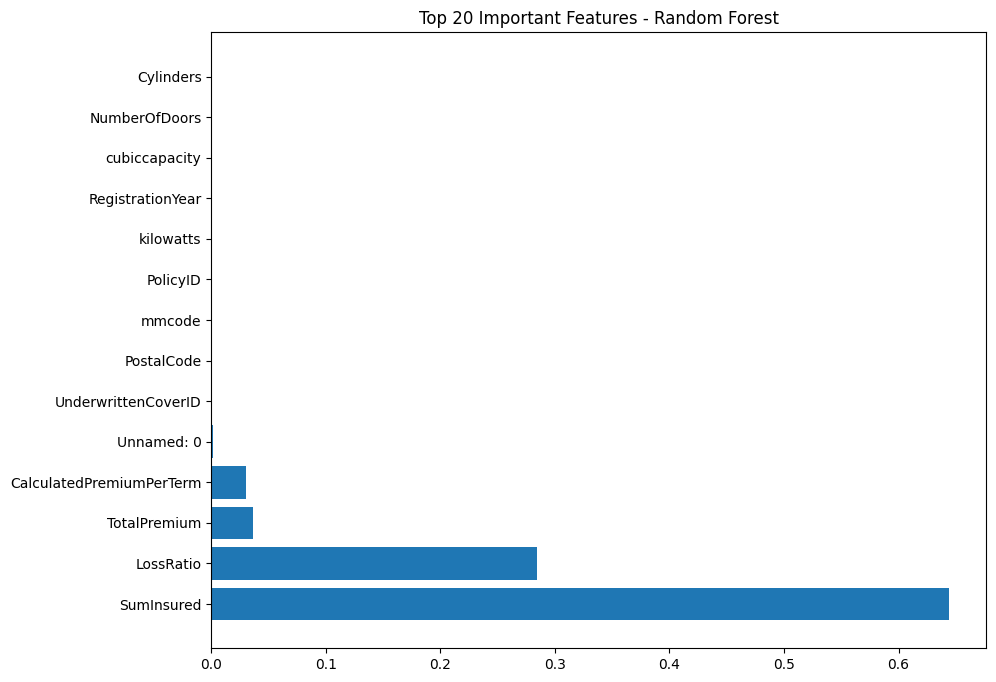

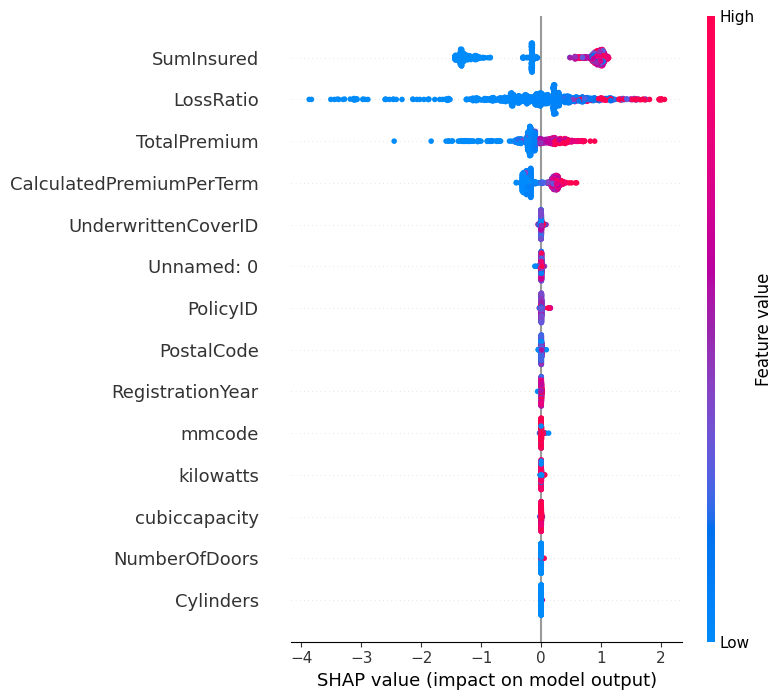

In [108]:
import shap
import matplotlib.pyplot as plt

# For Random Forest
rf = models["Random Forest"]
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_sev_final.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.title('Top 20 Important Features - Random Forest')
plt.show()

# SHAP analysis for XGBoost
explainer = shap.TreeExplainer(models["XGBoost"])
shap_values = explainer.shap_values(X_test_sev_scaled)
shap.summary_plot(shap_values, X_test_sev_scaled, feature_names=X_sev_final.columns)